# Comparison With IES

IES has the TM52 calculation built-in. 

Our script was developed before the IES version was available, and continues to have the following benefits: 
- Test easily over multiple air speeds
- Test over different reporting intervals (this is a requirement for Part O modelling)
- We can output the data (and graphs etc.) in a way that can be immediately useful when writing reports
- Apply CIBSE's guidance to use additional cooling with respect to the air speeds

To benchmark the analysis procedure of our script, we tested with this model:

*J:\J4321\Apps\IES-dev\adaptive_comfort\tests\testmodels\TestJob1*

As mentioned above, IES's version does not account for additional cooling in the maximum acceptable temperature. As stated in the guidance, additional cooling is ignored within the maximum acceptable temperature if the air speed is less than or equal to 0.1 metres per second. Therefore, we have produced a report using IES's script where the elevated air speed is set to 0.1 metres per second. This mean that the maximum acceptable temperature will be the same for both IES and MF scripts as they won't account for the additional cooling variable.

We then obtained the results produced from our script where elevated air speed is 0.1 metres per second so we could compare the two reports. The criterion results from both reports should be the same.

## Past Issue - Now Resolved

We discovered an inconsistency between the dry-bulb temperature obtained from the Python API and the dry-bulb temperature obtained from VistaPro. 

The reason this is the case is because VistaPro adjusts the time to accommodate for daylight savings. We have now adjusted our own script to deal with this.

Link to the forum post here: https://forums.iesve.com/viewtopic.php?t=76699&sid=590d8b2e529d06c0012423b15863e09f

Below are plots showing the difference between the dry-bulb temperature obtained from the IES API and VistaPro.

In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cwd = pathlib.Path().cwd()

In [2]:
# Load dry-bulb from API and VistaPro
arr_from_api_utc = np.load(cwd / "tests" / "arr_dry_bulb_temp_utc.npy")
arr_from_api_bst = np.load(cwd / "tests" / "arr_dry_bulb_temp_bst.npy")
df = pd.read_csv(cwd / "tests" / "dry_bulb_temperature_from_vista.txt", delimiter="\t", encoding='latin1', header=2)
arr_from_vista = np.array(df.iloc[:, 2])

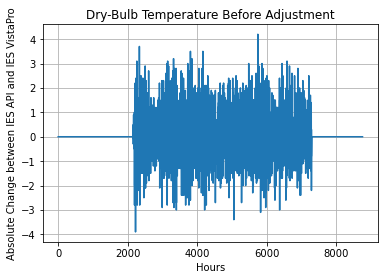

In [3]:
abs_change = arr_from_api_utc[:-1].astype(float).round(1) - arr_from_vista[1:].round(1)
plt.plot(range(len(abs_change)), abs_change)
plt.xlabel('Hours')
plt.ylabel('Absolute Change between IES API and IES VistaPro')
plt.title('Dry-Bulb Temperature Before Adjustment')
plt.grid(True)
plt.show()


The above plot shows us the absolute difference between the dry-bulb temperatures: one obtained from the IES Python API; the other from VistaPro. We see that up to around the 2000 hours mark (end of March), the values are identical (the difference is 0). Then suddenly there are oscillations in the data following this. It then returns back to being identical after around 7000 hours (end of October). 

IES's response to this is that the raw values from the API do not account for daylight savings.

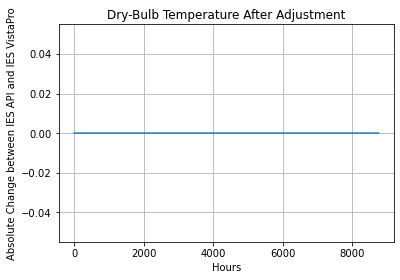

In [4]:
abs_change = arr_from_api_bst[:-1].astype(float).round(1) - arr_from_vista[1:].round(1)
plt.plot(range(len(abs_change)), abs_change)
plt.xlabel('Hours')
plt.ylabel('Absolute Change between IES API and IES VistaPro')
plt.title('Dry-Bulb Temperature After Adjustment')
plt.grid(True)
plt.show()

After adding some code to our scripts which adjusts the API values for daylight savings, we now see that the results from VistaPro match exactly to the adjusted data.

### Comments on adjusting for daylight savings

- BST is not a scientific measure (i.e. an hour of physical readings (i.e. temperature) is not physically repeated in March or lost in October)
- It is not clear in the documentation of either VEscripts or VistaPro that BST is applied. As a simulation tool we'd suggest the typical working assumption would be to use UTC time.
- There should be consistency between the results in VistaPro and what is retrievable from the API, discrepancies (even minor ones) lead to confusion and undermine the results obtained from the API.
- We suggest that there should be a keyword argument within the API retrieval that allows the developer to retrieve the data as either *BST* or as *UTC* (*GMT*). This would allow us to retrieve data equivalent to what is accessible in the User Interface.

## Criteria Failing

Following that, we should see whether the issue above affects our report. Let's see whether the correct criteria are failing.

Firstly, let's see whether the same rooms fail when using IES compared to our (Max Fordham) results. 

In [11]:
FPTH_TEST_ALL_CRITERIA = cwd / "tests" / "test_all_criteria.xlsx"
df = pd.read_excel(FPTH_TEST_ALL_CRITERIA, sheet_name=None)

In [12]:
df["Criteria Failing, Air Speed 0.1"].fillna('')

,Room Name,IES Results,MF Results,IES v MF
0,A_01_XX_XX_ApartmentSW,2,2,True
1,A_01_XX_XX_ApartmentS1,1 & 2,1 & 2,True
2,A_01_XX_XX_ApartmentS2,1 & 2,1 & 2,True
3,A_01_XX_XX_ApartmentN1,,,True
4,A_01_XX_XX_ApartmentNW,,,True
5,A_01_XX_XX_ApartmentNE,,,True
6,A_01_XX_XX_ApartmentN2,,,True
7,A_02_XX_XX_ApartmentSW,1 & 2,1 & 2,True
8,A_02_XX_XX_ApartmentS1,1 & 2,1 & 2,True
9,A_02_XX_XX_ApartmentSE,1 & 2,1 & 2,True


## Criterion 1: IES v MF
We will look at the absolute change and relative change between the IES report and the Max Fordham report. We want to be absolutely sure that our results produce an almost identical output within a very small margin of error.

In [13]:
del df["Criterion 1, Air Speed 0.1"]["index"]  # Remove index column
df["Criterion 1, Air Speed 0.1"].fillna('')  # Show data frame

,Room Name,IES Results,MF Results,Criterion 1 Absolute Change,Criterion 1 Relative Change (%)
0,A_01_XX_XX_ApartmentSW,2.5,2.45,-0.05,-2.0
1,A_01_XX_XX_ApartmentS1,7.8,7.79,-0.01,-0.128205
2,A_01_XX_XX_ApartmentS2,8.1,8.09,-0.01,-0.123457
3,A_01_XX_XX_ApartmentN1,0.0,0.00,0.00,
4,A_01_XX_XX_ApartmentNW,0.0,0.00,0.00,
5,A_01_XX_XX_ApartmentNE,0.0,0.00,0.00,
6,A_01_XX_XX_ApartmentN2,0.0,0.00,0.00,
7,A_02_XX_XX_ApartmentSW,10.6,10.59,-0.01,-0.09434
8,A_02_XX_XX_ApartmentS1,26.0,26.04,0.04,0.153846
9,A_02_XX_XX_ApartmentSE,11.6,11.57,-0.03,-0.258621


```{note}
Empty relative change cells are due to division by 0.
```

## Criterion 2: IES v MF

In [14]:
del df["Criterion 2, Air Speed 0.1"]["index"]  # Remove index column
df["Criterion 2, Air Speed 0.1"].fillna('')   # Show data frame

,Room Name,IES Results,MF Results,Criterion 2 Absolute Change,Criterion 2 Relative Change (%)
0,A_01_XX_XX_ApartmentSW,11,11,0,0.0
1,A_01_XX_XX_ApartmentS1,14,14,0,0.0
2,A_01_XX_XX_ApartmentS2,15,15,0,0.0
3,A_01_XX_XX_ApartmentN1,0,0,0,
4,A_01_XX_XX_ApartmentNW,0,0,0,
5,A_01_XX_XX_ApartmentNE,0,0,0,
6,A_01_XX_XX_ApartmentN2,0,0,0,
7,A_02_XX_XX_ApartmentSW,25,25,0,0.0
8,A_02_XX_XX_ApartmentS1,27,27,0,0.0
9,A_02_XX_XX_ApartmentSE,31,31,0,0.0


## Criterion 3: IES v MF

In [15]:
del df["Criterion 3, Air Speed 0.1"]["index"]  # Remove index column
df["Criterion 3, Air Speed 0.1"].fillna('')   # Show data frame

,Room Name,IES Results,MF Results,Criterion 3 Absolute Change,Criterion 3 Relative Change (%)
0,A_01_XX_XX_ApartmentSW,2,2,0,0.0
1,A_01_XX_XX_ApartmentS1,2,2,0,0.0
2,A_01_XX_XX_ApartmentS2,2,2,0,0.0
3,A_01_XX_XX_ApartmentN1,0,0,0,
4,A_01_XX_XX_ApartmentNW,0,0,0,
5,A_01_XX_XX_ApartmentNE,0,0,0,
6,A_01_XX_XX_ApartmentN2,0,0,0,
7,A_02_XX_XX_ApartmentSW,3,3,0,0.0
8,A_02_XX_XX_ApartmentS1,3,3,0,0.0
9,A_02_XX_XX_ApartmentSE,3,3,0,0.0


## Running Mean Temperature

In [16]:
FPTH_TEST_ALL_CRITERIA = cwd / "tests" / "test_running_mean_temp.xlsx"
df = pd.read_excel(FPTH_TEST_ALL_CRITERIA, sheet_name=None)
del df["Running Mean Temperature"]["index"]

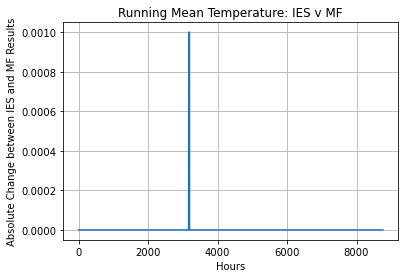

In [17]:
plt.plot(df["Running Mean Temperature"].index, df["Running Mean Temperature"].loc[:, "Absolute Change"])
plt.xlabel('Hours')
plt.ylabel('Absolute Change between IES and MF Results')
plt.title('Running Mean Temperature: IES v MF')
plt.grid(True)
plt.show()

## Max Acceptable Temperature

In [18]:
FPTH_TEST_ALL_CRITERIA = cwd / "tests" / "test_max_acceptable_temp.xlsx"
df = pd.read_excel(FPTH_TEST_ALL_CRITERIA, sheet_name=None)
del df["Max Acceptable Temperature"]["index"]

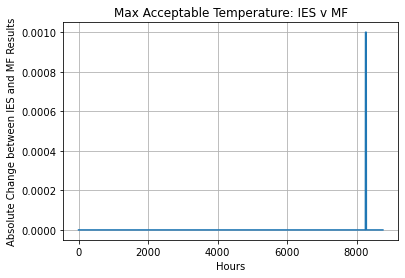

In [19]:
plt.plot(df["Max Acceptable Temperature"].index, df["Max Acceptable Temperature"].loc[:, "Absolute Change"])
plt.xlabel('Hours')
plt.ylabel('Absolute Change between IES and MF Results')
plt.title('Max Acceptable Temperature: IES v MF')
plt.grid(True)
plt.show()

## Operative Temperature

For $v = 0.1ms^{-1}$ where $v$ is the elevated air speed.
We will look at only one room : A_01_XX_XX_ApartmentSW

In [20]:
FPTH_TEST_ALL_CRITERIA = cwd / "tests" / "test_operative_temp.xlsx"
df = pd.read_excel(FPTH_TEST_ALL_CRITERIA, sheet_name=None, usecols="A:E", header=1)
del df["Operative Temp, Air Speed 0.1"]["Unnamed: 0"]
df["Operative Temp, Air Speed 0.1"] = df["Operative Temp, Air Speed 0.1"].drop([0])
df["Operative Temp, Air Speed 0.1"] = df["Operative Temp, Air Speed 0.1"].reset_index(drop=True)

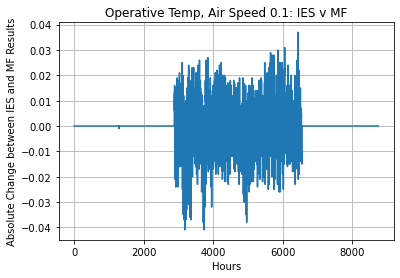

In [21]:
plt.plot(df["Operative Temp, Air Speed 0.1"].index, df["Operative Temp, Air Speed 0.1"].loc[:, "Absolute Change"])
plt.xlabel('Hours')
plt.ylabel('Absolute Change between IES and MF Results')
plt.title('Operative Temp, Air Speed 0.1: IES v MF')
plt.grid(True)
plt.show()